# MINI-PROJECT 1     
## A Study on how the Collected Data Size Affect the Simulation of $e^+$$e^-$ Collison
### QINTONG LI
### Date: 25/10/2021

---

# <a id="content"></a>CONTENT

## 1. [Introduction](#intro)
* Background information
* Derivation of theory

## 2. [Methods](#method)
* Generate data using numerical inverse transform method
* Choose appropriate fitting method based on given conditions in each group
* Use Iminuit to complete simulations
 
## 3. [Basic plottings](#plot)
###  i. [Scenario Group I](#I ): Collect a few 10s(20 or 30) of these events/day and (say) would run for 100 days a year. ($n = 100\times10 = 1000$)
* Plot when $\kappa = -0.07$
* [Comparison I](#CI) of three plots with different values of $\kappa$

### ii. [Scenario Group II](#II): Collect a few 100s(200 or 300) of these events/day and (say) would run for 100 days a year. ($n = 100\times100 = 10000$)
* Plot when $\kappa = -0.07$
* [Comparison II](#CII) of three plots with different values of $\kappa$

### iii. [Scenario Group III](#III): Collect a few 1000s(2000 or 3000) of these events/day and (say) would run for 100 days a year. ($n = 100\times1000 = 100000$)
* Plot when $\kappa = -0.07$
* [Comparison III](#CIII) of three plots with different values of $\kappa$

## 4. [Analysis with further plottings](#A)
* ### Variation of the goodness of the fittings caused by the size of data set

i. Evolution of $\chi^2$ when size of the data is growing 

ii. Evolution of $\kappa$ with associated uncertainties

## 5. [Discussion and Summary](#dis)


--------------------------------------------------------------------------------------------------------------------

# <a id="intro"></a> [Introduction](#content)

## Background information

When electrons $(e^-)$ and positrons $(e^+)$ collide together they sometimes produce two muons $(\mu^- , \mu^+)$ that come out of the collision back-to-back. The angle between the incoming $e^+$ and the outgoing $\mu^+$ is defined to be $\theta$. See the figure below:
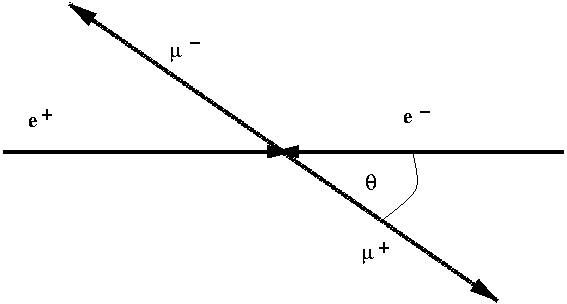

If the energy of the $e^-e^+$ collision is a long way below the mass of the $Z$ boson then $\theta$ has a distribution of $1+\cos^2\theta$. However, as the centre of mass energy of the collision approaches that of the $Z$ boson an asymmetry appears and the distribution becomes Eq.1 as shown below:

$$\cal{A}(1+\cos^2\theta) + \cal{B} \cos \theta $$

which can be written $(1+\cos^2\theta) + \dfrac{\cal{B}}{\cal{A}}\cos \theta$. The ratio $\dfrac{\cal{B}}{\cal{A}}= \kappa$ varies greatly (up to a maximum of ~10%) around the collision energies near the centre of mass of the $Z$ boson and even changes sign. In the 1990s measuring these assymetries was an important scientific goal as they told us much about electroweak unification.

In the early 1990s the LEP collider at CERN was one of the first  $e^-e^+$ colliders to run near the $Z$ mass. 
The aim of the mini-project is to determine how well the experiments could measure $\kappa$ in three different scenarios:

1. When LEP started running each experiment would collect a few 10s(20 or 30) of these events/day and (say) would run for 100 days a year.

2. A couple of years later each experiment would collect a few 100s(200 or 300) of these events/day and (say) would run for 100 days a year.

3. A couple of years later again each experiment would collect a few 1000s(2000 or 3000) of these events/day and (say) would run for 100 days a year.

Consider (and simulate) three different values for $\kappa = \pm 0.07$ and $0$. You should fit your simulation to consider how well you can tell them apart and what precision can you make on the individual measurements. 



## Derivation of theory

In this project, the centre of mass energy of the collision should be proportional to Eq.1, which means the model that can be utilized for simulation is in the form of Eq.2 as shown below: 

$$a(1+\cos^2\theta+\kappa\cos\theta)$$


It is worth to be noticed that in this case, the analysis will be carried out **in the range of $(0,2\pi)$** to make sure that the simulation is physically meaningful.

The experimental data in this project needs to be generated first. When the value of $\kappa$ is given initially to generate data sets(collected data in this case), the simulation(fittings) of each individual measurement can then be interpreted using Eq.2.

# <a id="method"></a>[Methods](#content)
* ### Generate data sets

With the function that may be difficult to either integrate or invert. In which case provided that it can be integrated numerically just by summing the entries in the numpy array. Normally, the integral should be set to be equal to 1 and then just sampling can be taken place between [0,1]. Next step is to interpolate between those steps in the integration.This can either be linear or cubic spline. Cubis spline is used in this project.

* ### Plot fittings in different scenarios

When the size of measurements varies, the method should be chosen is also different. In this project, the difference between each case will be discussed after plottings and analysis.

* ### Analyzing the deviation of the fittings

While fitting the data distribution with proper assumptions, one of the most significant element in the process is to minimise the deviation of the assumption from the truth. The assumption can be a defined probability distribution function, or the data might follow certain pattern in a functional form. To present the goodness of the fitting in all physical measurements, uncertainty plays an important role in all measured quantities.In this project, this job is done by iminuit.

<div class="alert alert-danger"> <p>

<b>N.B.</b> 
All in code comments will be explaining the specific purpose of the code. The discussion and summary will be presented after eahc graph in a text cell when it is needed.
</div>

# <a id="plot"></a> [Basic plottings](#content)

In [1]:
# Import all required tools
import numpy as np
import numpy.random as npr
import scipy.interpolate as spi
import matplotlib.pyplot as pl
from iminuit import cost, Minuit

In [2]:
### define values for parameters that were required to be analyzed
# define the sizes of data
nr_1 = 1000
nr_2 = 10000
nr_3 = 100000
# define the values for kappa
kappa_1 = -0.07
kappa_2 = 0
kappa_3 = 0.07
# define the values for initial guessing of the parameter a
a_i = 6
a_ii = 66
a_iii = 660

x=np.arange(0,2*np.pi,0.001) # create an array of data in the range of (0,2pi)

In [3]:
def comEnergy(x, a, k):# define a function as a model to fit the generated data
    """
    This function is used to return the centre of mass energy 
    for collisions between an electron and a positron
    Input: 
          x: The angle between the incoming $e^+$and the outgoing $\mu^+$ is defined to be $\theta$.
          a: a parameter adjusting the amplitude of the distribution.
          k(kappa): the ratio of two terms in the distribution.#
    Output:
          E: The energy probability distribution function after collison(when x is a variable)
    """
    E = a*(1 + np.cos(x)**2 + k*np.cos(x))
    return E

## <a id = "I"> </a>[Scenario Group I](#content)

1. When LEP started running each experiment would collect a few 10s(20 or 30) of these events/day and (say) would run for 100 days a year.
* $\kappa = -0.07$
* $\kappa = 0$
* $\kappa = 0.07$

([<matplotlib.lines.Line2D at 0x7f2bf304d6d0>],
 [<matplotlib.lines.Line2D at 0x7f2bf303df40>])

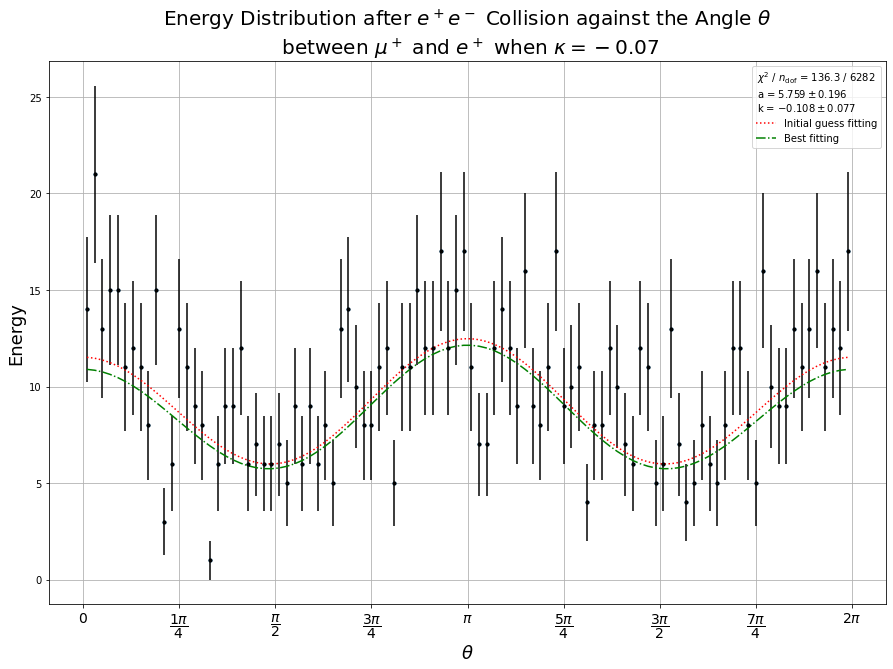

In [4]:
##################################################
#### Define a function to plot the graphs ########
## in all scenarios with data points, fittings####
##### and associated uncertainties in legends ####
##################################################


# more details will be given in the function
def simul(x,nr,kappa,a_g):
    """
    This function is used to plot the generated data points with a given model, 
    the fittings for those dataponts and the associated uncertainties using Leastsquare function
     as the cost function.
    Input:
         x: The angle between the incoming $e^+$and the outgoing $\mu^+$ is defined to be $\theta$ in the 
         range of (0,2pi)
         nr: The size of the measurement
         a_g: initial guess value of parameter a
    Output: 
         the wanted graph
    """
    ######################
    ### Generate data  ###
    ### for scenarios ###
    ######################
    xsq_11=1 + np.cos(x)**2 + kappa*np.cos(x) # generate distribution based on given relation
    y_11=xsq_11.cumsum() # summations of the elements in the array
    y_11=y_11/y_11[-1] # normalise to 1
    f_11 = spi.CubicSpline(y_11,x) # Using cubic spline to interpolate between steps
    yr_11 = npr.uniform(size=nr)# generate random number for size of each bin
    xr_11= f_11(yr_11)
    n_11,bins_11,patches_11 = pl.hist(xr_11,bins=100, lw=1,ec="blue", fc="white", alpha=0.3)
    pl.close()# grab information from histogram


    pl.rcParams['figure.figsize'] = [15, 10]# Adjust the graph size for best visualization

    ######################
    ### Fitting data  ####
    ### for scenarioI1 ###
    ######################
    # move the datapoints from the corner to the centres to avoid unequality between sizes(binsize and number of bins)
    bin_centres_11=[]
    for i in range(len(bins_11)-1):
        bin_centres_11.append((bins_11[i]+bins_11[i+1])/2)
    bin_centres_11=np.array(bin_centres_11)

    # plot the generated data points at bin centres with appropriate labels and title
    pl.plot(bin_centres_11,n_11,'.')
    n_err_11=np.sqrt(n_11)# calculate the error for each bin(sqrt of the event number in each bin)
    pl.errorbar(bin_centres_11, n_11, n_err_11,fmt='k.')
    xtick_loc=np.arange(0,2*np.pi+0.00001,np.pi/4)
    xtick_label=["0","$\dfrac{1\pi}{4}$","$\dfrac{\pi}{2}$","$\dfrac{3\pi}{4}$","$\pi$",
                 "$\dfrac{5\pi}{4}$","$\dfrac{3\pi}{2}$","$\dfrac{7\pi}{4}$","2$\pi$"]
    pl.xticks(xtick_loc,xtick_label,fontsize = 14)
    pl.xlabel("$\\theta$",fontsize = 18)
    pl.ylabel("Energy",fontsize = 18)
    pl.title("Energy Distribution after $e^+$$e^-$ Collision against the Angle $\\theta$ \n between $\mu^+$ and $e^+$ when $\kappa = {0}$".format(kappa),fontsize = 20)
    pl.grid()

    # simulate the model to fit given data using iminuit
    n_err_effect_11=[x  if x>0 else 0.1 for x in n_err_11] # errors of 0 really screw up a least squares fit
    c_11=cost.LeastSquares(bin_centres_11, n_11, n_err_effect_11, comEnergy)
    params_11=[a_g,-0.08]# make an initial guess
    m_11=Minuit(c_11,*params_11)
    m_11.migrad()# migrad generate best parameters based on initial guessing
    m_11.hesse()
    
    ##########################
    ### Plotting the best ####
    ### best fits with data###
    ##########################
    a = pl.plot(bin_centres_11, comEnergy(bin_centres_11,*params_11), "r:",label="Initial guess fitting")
    b = pl.plot(bin_centres_11, comEnergy(bin_centres_11, *m_11.values), "g-.",label="Best fitting")
    fit_info_11 = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_11.fval:.1f} / {len(x) - m_11.nfit}",]
    for p, v, e in zip(m_11.parameters, m_11.values, m_11.errors):
        fit_info_11.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    pl.legend(title="\n".join(fit_info_11),loc='best')
    return a,b


simul(x,nr_1,kappa_1,a_i)#plot a graph for scenarioI with kappa = -0.07

<div class="alert alert-success"> <p>

<b>Discussion: </b> 
This code is written to generate different set of data everytime we run it. Run the code above for several tirals. The variantion of the value of $\kappa$ is significant. The uncertainty of each $\kappa$ is also noticable. It shows that the simulation does not work as well as expected. Repeat this process with different values of $\kappa$ and see if it changes the variation in the $\kappa$ values.
</div>

# <a id = "CI"> </a>[Comparison I](#content) 

([<matplotlib.lines.Line2D at 0x7f2bf25ca0a0>],
 [<matplotlib.lines.Line2D at 0x7f2bf25ca370>])

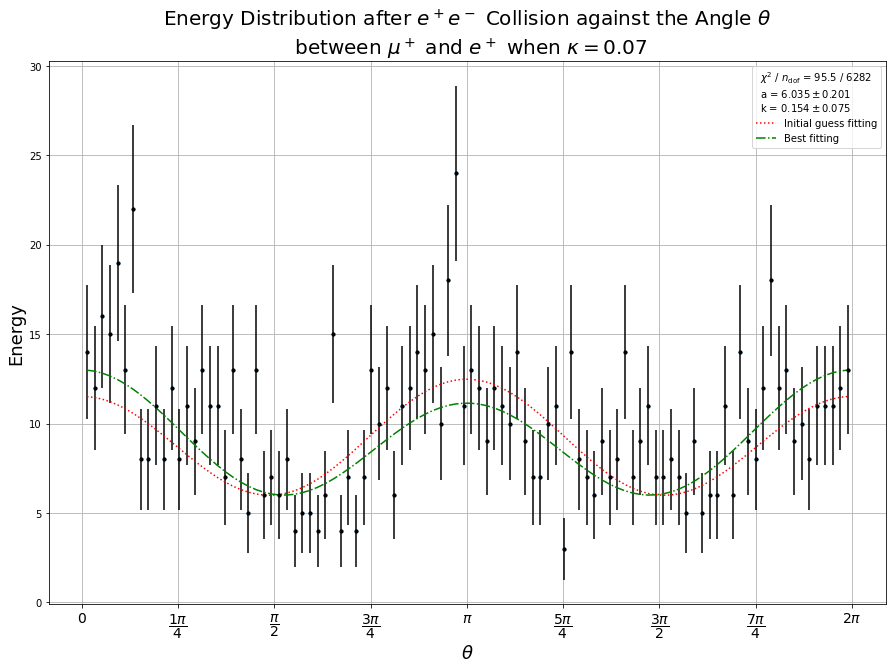

In [5]:
# plot the fittings for three different kappa values and compare the goodness of them 
# using the uncertainties of kappa
pl.rcParams['figure.figsize'] = [20, 35]
pl.subplot(3,1,1)
simul(x,nr_1,kappa_1,a_i)
pl.subplot(3,1,2)
simul(x,nr_1,kappa_2,a_i)
pl.subplot(3,1,3)
simul(x,nr_1,kappa_3,a_i) 

<div class="alert alert-success"> <p>

<b>Discussion: </b> 

Run the code above for more trials. The variantion of the values of $\kappa$ are still significant with their associated uncertainties. It means that the value of $\kappa$ does not make any difference in the goodness of the fittings. Therefore, it is now reasonable to assume that the **size of the data** may affect the goodness of fittings. 

To test this hypothesis, we need to repeat the process above for lager numbers of measurements, which is exactly the scenarios in Group II and III
</div>

## <a id="II"></a>[Scenario Group II](#content)

1. When LEP started running each experiment would collect a few 100s(200 or 300) of these events/day and (say) would run for 100 days a year.
* $\kappa = -0.07$
* $\kappa = 0$
* $\kappa = 0.07$

([<matplotlib.lines.Line2D at 0x7f2bf2f8c730>],
 [<matplotlib.lines.Line2D at 0x7f2bf2f8ca00>])

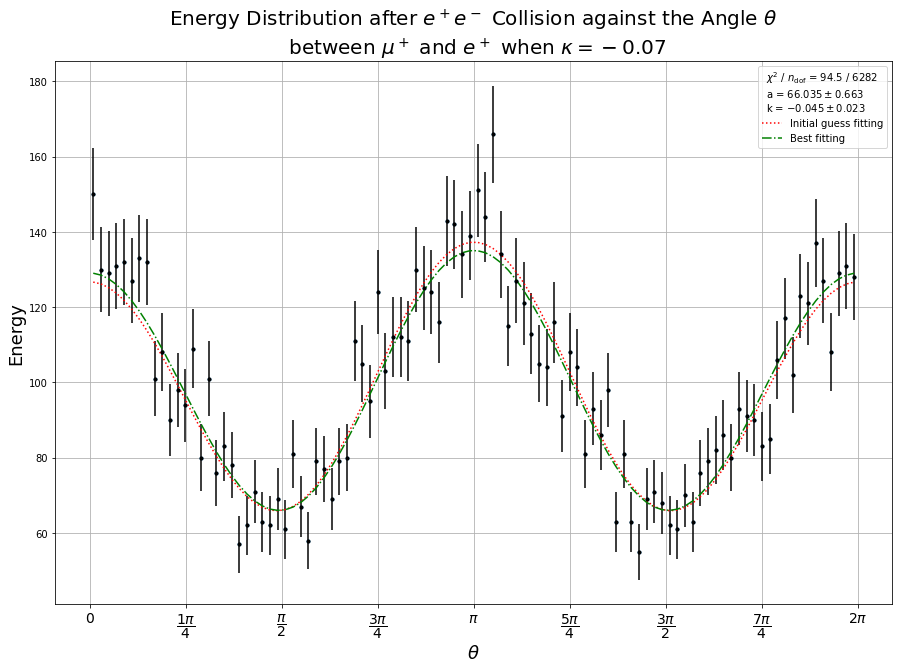

In [6]:
simul(x,nr_2,kappa_1,a_ii)# Plot the fitting for kappa = -0.07 first

<div class="alert alert-success"> <p>

<b>Discussion: </b> 

After running for several trials, it shows that the $\kappa$ value still varies a lot for each set of data with number of measurements n = 10000. However, it is worth noticing that the uncertainty of $\kappa$ has decreased and the value of $\chi^2$ also dropped when the number of measurements grows. To improve this assumption, we need to run the code for the other two values of $\kappa$ and compare the graphs as previously did.
</div>

# <a id = "CII"> </a>[Comparison II](#content)

([<matplotlib.lines.Line2D at 0x7f2bf2cda340>],
 [<matplotlib.lines.Line2D at 0x7f2bf2cdab20>])

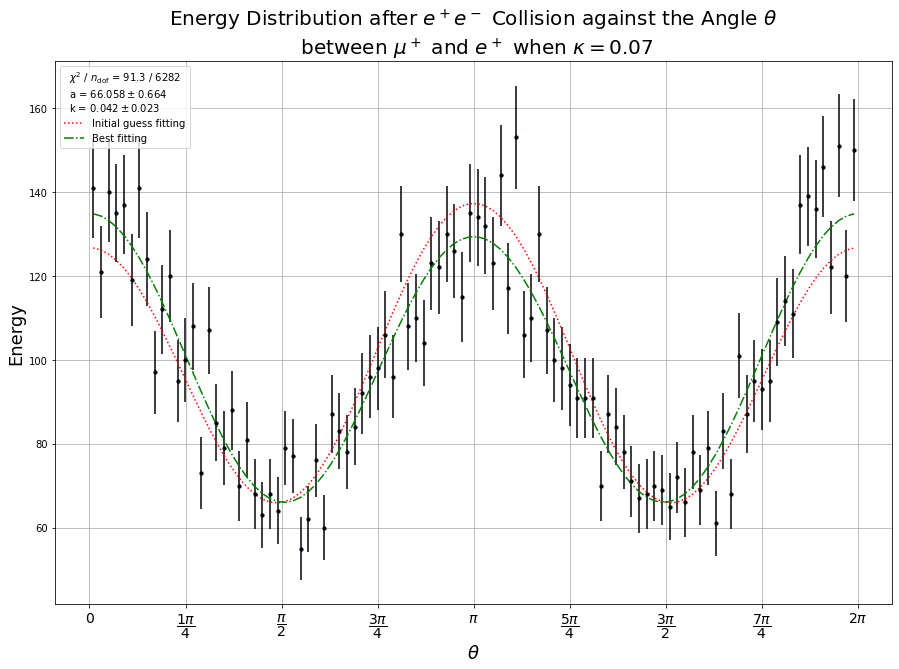

In [7]:
# plot the fittings for three different kappa values and compare the goodness of them 
# using the uncertainties of kappa
pl.rcParams['figure.figsize'] = [20, 35]
pl.subplot(3,1,1)
simul(x,nr_2,kappa_1,a_ii)
pl.subplot(3,1,2)
simul(x,nr_2,kappa_2,a_ii)
pl.subplot(3,1,3)
simul(x,nr_2,kappa_3,a_ii) 

<div class="alert alert-success"> <p>

<b>Discussion: </b> 

After running for several trials, it shows that the variation of $\kappa$ is less significant compared with the previous case in scenario Group I. Meanwhile, the uncertainties of $\kappa$ also has decreased. Therefore, it should be carried out in the next group with larger data size to obtain more obvious results.

</div>

## <a id="III"></a>[Scenario Group III](#content)

1. When LEP started running each experiment would collect a few 1000s(2000 or 3000) of these events/day and (say) would run for 100 days a year.
* $\kappa = -0.07$
* $\kappa = 0$
* $\kappa = 0.07$

([<matplotlib.lines.Line2D at 0x7f2bf2835520>],
 [<matplotlib.lines.Line2D at 0x7f2bf28357f0>])

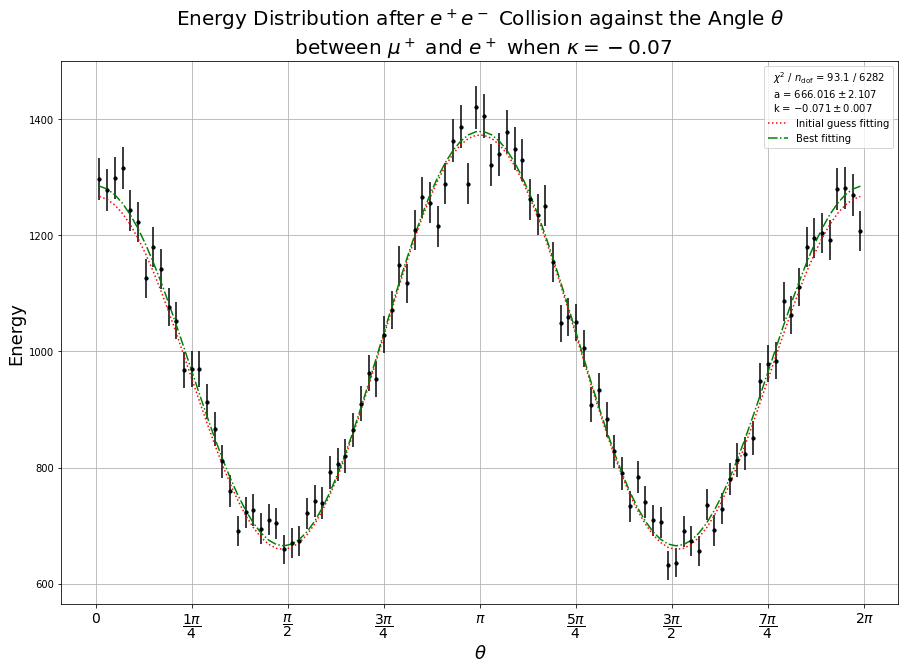

In [8]:
simul(x,nr_3,kappa_1,a_iii) # Plot the fitting for kappa = -0.07 first

<div class="alert alert-success"> <p>

<b>Discussion: </b> 

As it is illustrated in the graph after several trials, the value of $\kappa$ barely changed for each trial. The uncertainties associate to $\kappa$ also drops to a acceptable percentage.To make the conclusion more completed. This process still needs to be repeated for the other values of $\kappa$ even if it might have very limited impact on the fittings.

</div>

# <a id = "CIII"> </a> [Comparison III](#content)

([<matplotlib.lines.Line2D at 0x7f2bf29147c0>],
 [<matplotlib.lines.Line2D at 0x7f2bf2914a90>])

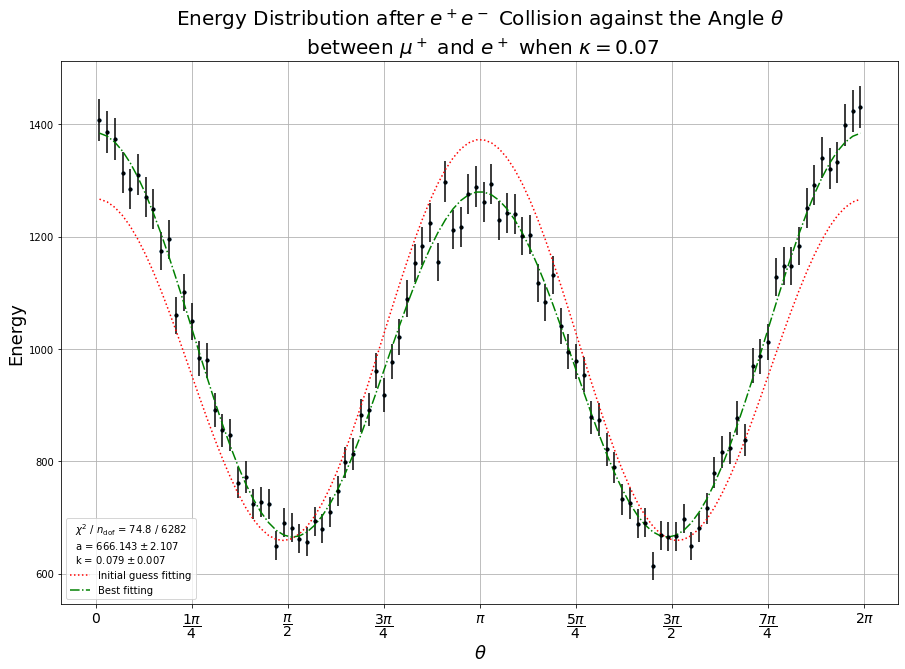

In [9]:
# plot the fittings for three different kappa values and compare the goodness of them 
# using the uncertainties of kappa
pl.rcParams['figure.figsize'] = [20, 35]
pl.subplot(3,1,1)
simul(x,nr_3,kappa_1,a_iii)
pl.subplot(3,1,2)
simul(x,nr_3,kappa_2,a_iii)
pl.subplot(3,1,3)
simul(x,nr_3,kappa_3,a_iii) 

<div class="alert alert-success"> <p>

# <b>Conclusion: </b> 

Some intial-stage conclusion can be made at this point:
1. The value of $\kappa$ used to generate data points does not cause significant impact on the goodness of the fittings
2. The larger the data size becomes, the better the fittings will be.
3. A decent number of data points in this experiment should be the case in Scenario Group II

To test this qualitative conclusion further with quantitative methods, more analysis is required in next stage of this project. 

</div>

# <a id = "A"> </a>[Analysis with further plottings](#content)

In this section, the goodness of the fittings in the previous session will be assessed with related quantities: $\chi^2$, simulated $\kappa$, the uncertainty of $\kappa$ $\delta\kappa$. Plottings of these quantities will be presented to demonstrate the impact of some element.

Based on the conclusion from the last section, the element that affect the value of above quantities significantly is the size of the data. Therefore, the x_axis of the plots in this section will be the different sizes of the data set.

As it is also concluded previously, the fitting only becomes meaningful when the size of data reached the number in Scenario Group II. We will be focusing on the range of sizes that show the clearest trend. The way to illustrate it is to plot the graphs in different scales because the trend does not show so obviously as the number of measurements grows after some point.

In [10]:
# Give two stes of sizes of measurements in two different scales
t_1 = (1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,9000,10000,11000)
t_2 = (10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,90000,100000,110000)
n_h = len(t_1)
n_h_2 = len(t_2)
h = -0.07*np.ones(n_h)

In [11]:
##########################
## Define a function for##
# the value of chi^2, the#
#value of kappa and its ## 
# associated uncertainty##
##########################

def Param(x,t):
    """
    This function is defined to obtain the quantities that can justify the deviation
    of the fittings from Minuit. More specifically, the value of chi^2, the value of kappa
    and its associated uncertainty will be generated with this function.
    Input: 
         x: The angle between the incoming $e^+$and the outgoing $\mu^+$ is defined to be $\theta$ in the 
         range of (0,2pi).
         t: a set of size of data.
    Output: 
          chi_kappa: the value of chi^2.
          k: the value of kappa.
          k_err: the uncertainty of kappa.
    """
    np.random.seed(1)# we want to analyze based on the same set of data
    
    # create empty arrays for the wanted quantities
    chi_kappa = []
    params_kappa_1 = []
    params_kappa_1_err = []
    # create a loop to have different size of data and generate the bins and the number of events in each bin
    for i in t:
        xsq = 1 + np.cos(x)**2 + kappa_1*np.cos(x) # generate distribution based on given relation
        y=xsq.cumsum() # summations of the elements in the array
        y=y/y[-1] # normalise to 1
        f = spi.CubicSpline(y,x) # Using cubic spline to interpolate between steps
        yr = npr.uniform(size = i)# generate random number for size of each bin
        xr= f(yr)
        n,bins,patches = pl.hist(xr,bins=100, lw=1,ec="blue", fc="white", alpha=0.3)# grab information from histogram
        pl.close()# unplot the histogram
        n_err=np.sqrt(n)# calculate the error for each bin(sqrt of the event number in each bin)
        n_err_effect=[x  if x>0 else 0.1 for x in n_err] # errors of 0 really screw up a least squares fit

        bin_centres=[]
        for i in range(len(bins)-1):
            bin_centres.append((bins[i]+bins[i+1])/2)
        bin_centres=np.array(bin_centres)

        c=cost.LeastSquares(bin_centres, n, n_err_effect, comEnergy)
        params=[6,-0.08]# make an initial guess
        m=Minuit(c,*params)
        m.migrad()# migrad generate best parameters based on initial guessing
        m.hesse()
        
        chi_kappa.append(m.fval)
        params_kappa_1.append(m.values)
        params_kappa_1_err.append(m.errors)
        
    chi_kappa = np.array(chi_kappa)
    params_kappa_1 = np.array(params_kappa_1)
    params_kappa_1_err = np.array(params_kappa_1_err)

    a0,k = np.hsplit(params_kappa_1,2)#split the parameters into a and kappa horizontally
    a0_err, k_err = np.hsplit(params_kappa_1_err,2)
    k = k.ravel()# transform the type of k into a 1D array
    k_err = k_err.ravel()

    return chi_kappa,k,k_err

chi_kappa_1,k_1,k_1_err = Param(x,t_1)
chi_kappa_2,k_2,k_2_err = Param(x,t_2)

In [12]:
##########################
## Define a function to ##
# plot the change in the #
# value of kappa and its #
# associated uncertainty##
## against size of data ##
##########################

def myfunc_1(t,k,k_err):
    """
    This function is written to plot the evolution of kappa depending on the 
    growth of data size. The uncertaintied of kappa is drawn in shadow to
    show a clearer trend.
    Input: 
         t: a set of size of data.
         k: the value of kappa.
         k_err: the uncertainty of kappa.
    Output: 
         A plot shows the evolution of kappa with it uncertainties when the data size expand.
    """
    f = pl.plot(t,h,'-.',label="Given $\kappa = -0.07$")
    g = pl.plot(t,k,"o-",label = "$\kappa$ simulated by different size of data")
    pl.errorbar(t,k,yerr=k_err,fmt = 'o')
    pl.fill_between(t, [p-e for p,e in zip(k,k_err)],[p+e for p,e in zip(k,k_err)],color = "yellow", alpha = 0.5)
    pl.title("A Plot for the Relation between \nthe Value of $\kappa$ and the Size of Data\n with associated uncertainties",fontsize = 22)
    pl.ylabel("Prameter $\kappa$",fontsize = 18)
    pl.yticks(fontsize=15)
    pl.xlabel("Number of collected data n",fontsize = 18)
    pl.xticks(fontsize=15)
    pl.grid()
    pl.legend(fontsize = 18)
    return f,g

##########################
## Define a function to ##
# plot the change in the #
# value of chi^2    ######
## against size of data ##
##########################

def myfunc_2(t,chi_kappa):
    """
    This function is to plot the graph that show the change in chi^2 value 
    when the size of data increases.
    Input:
         t: a set of size of data.
         chi_kappa: the value of chi^2.
    Output:
         j: A plot shows the change in chi^2 when the data size expand.
    
    """
    j = pl.plot(t,chi_kappa,"o-",label = "$\\chi^2$ calculated by different sizes of data")
    pl.title("A Plot for the Relation between \n the Value of $\chi^2$ and the Size of Data",fontsize = 22)
    pl.ylabel("$\chi^2$",fontsize = 18)
    pl.yticks(fontsize=15)
    pl.xlabel("Number of collected data n",fontsize = 18)
    pl.xticks(fontsize=15)
    pl.grid()
    pl.legend(fontsize = 18)
    return j

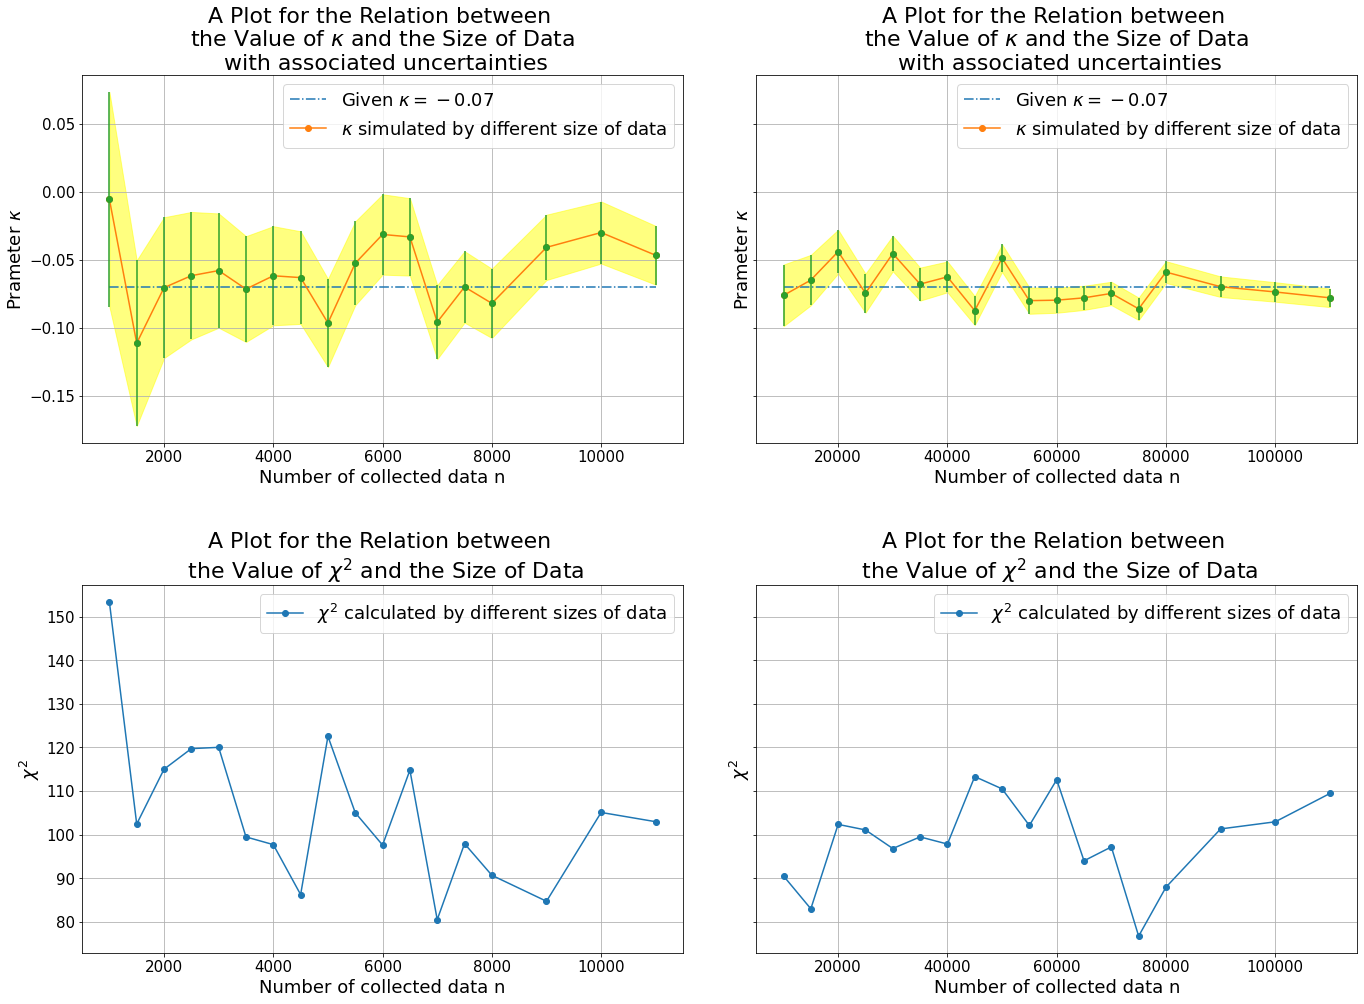

In [13]:
# plot the two similar graphs in the same y axis so that a change in y axis value can be shown in different scales
fig, axes = pl.subplots(nrows=2, ncols=2,sharey='row',figsize=(20,15))

pl.subplot(2,2,1)
myfunc_1(t_1,k_1,k_1_err)
pl.subplot(2,2,2)
myfunc_1(t_2,k_2,k_2_err)
pl.subplot(2,2,3) 
myfunc_2(t_1,chi_kappa_1)
pl.subplot(2,2,4) 
myfunc_2(t_2,chi_kappa_2)

fig.tight_layout(pad=4.5) 

# <a id="dis"></a>[Discussion and Summary](#content)

<div class="alert alert-success"> <p>

* The first row of graphs illustrate the evolution of the $\kappa$ value when the size of measurement grows. It is clearly showed that the simulated $\kappa$ is approaching the given $\kappa$ we used to generate the data as the size of data grows. 
    
    
* The shadow showed in first row of graphs represents the uncertainties of $\kappa$ and the trend of the change in it when the size of data expands. The area of shadow shrinks as the size grows, this means the value of simulated $\kappa$ becomes more and more reliable when we get more data in the experiment especially after the size reaches 10000(Scenario Group II). This means that the goodness of fitting can be improved by the increase in data size.
    
    
* The second row of graphs show the change in values of $chi^2$ in different scale. $chi^2$ is also an important element to justify the goodness of the fitting. As it is shown in the graphs, the value of $chi^2$ reduced rapidly and start to bounce around 100 after applying a certain size of the data set to it. If we use the reduced $chi^2$ value to interpret it, the value will become $\chi_{reduced}^2 = \chi^2/n_{dof} = \chi^2/6286$, Whic is much smaller than one in this case. It means the fitting is improved while increasing the size of data set.
    
    
* The lack of reliability in this model should also be taken into consideration when the data is not enough. In this case we need to change the method of fitting to find a better simulation. For small data size, the method we can use is **unbinned fitting**.  

</div>

## Using Unbinned Fitting for Scenario Group I

* In reality, it might be difficult to collect enough data in some circumstances. Therefore, it is also important to find a solution when the data size is not sufficient. As it is mentioned above, one of the methods is to use UnbinnedNLL function from Iminuit as the cost function. Instead of using Leastsquare funtion in this scenario, Unbinned fitting might works better for smaller data size.

* Here we just need to replace the cost function c_11 in the defined function *simul(x,nr,kappa,a_g)* with *c_U= cost.UnbinnedNLL(x, comEnergy_U)*.

* Due to the time limitation of this project, further improvement for the code will be carried on in the future. However, it is important to keep in mind that for different size of collected data we might need to apply different models and cost functions in the models in different situations for better simulations.

([<matplotlib.lines.Line2D at 0x7f2be9ea2cd0>],
 [<matplotlib.lines.Line2D at 0x7f2be9ea2fa0>])

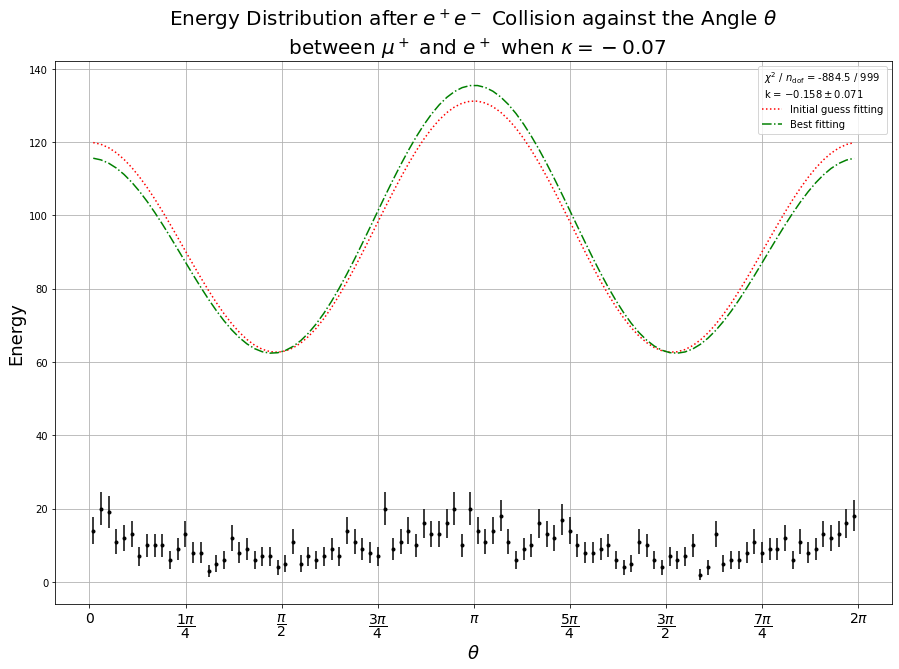

In [14]:
##################################################
#### Define a function to plot the graphs ########
## in all scenarios with data points, fittings####
##### and associated uncertainties in legends ####
##################################################
def comEnergy_U(x,k):# define a function as a model to fit the generated data
    """
    This function is used to return the centre of mass energy 
    for collisions between an electron and a positron
    Input: 
          x: The angle between the incoming $e^+$and the outgoing $\mu^+$ is defined to be $\theta$.
          a: a parameter adjusting the amplitude of the distribution.
          k(kappa): the ratio of two terms in the distribution.#
    Output:
          E: The energy probability distribution function after collison(when x is a variable)
    """
    E = 1 + np.cos(x)**2 + k*np.cos(x)
    #E = a*(1 + np.cos(x)**2 + k*np.cos(x))
    return E

# more details will be given in the function
def Unbin(x,nr,kappa):
    """
    This function is used to plot the generated data points with a given model, 
    the fittings for those dataponts and the associated uncertainties using Leastsquare function
     as the cost function.
    Input:
         x: The angle between the incoming $e^+$and the outgoing $\mu^+$ is defined to be $\theta$ in the 
         range of (0,2pi)
         nr: The size of the measurement
         a_g: initial guess value of parameter a
    Output: 
         the wanted graph
    """
    ######################
    ### Generate data  ###
    ### for scenarios ###
    ######################
    xsq_11=1 + np.cos(x)**2 + kappa*np.cos(x) # generate distribution based on given relation
    y_11=xsq_11.cumsum() # summations of the elements in the array
    y_11=y_11/y_11[-1] # normalise to 1
    f_11 = spi.CubicSpline(y_11,x) # Using cubic spline to interpolate between steps
    yr_11 = npr.uniform(size=nr)# generate random number for size of each bin
    xr_11= f_11(yr_11)
    n_11,bins_11,patches_11 = pl.hist(xr_11,bins=100, lw=1,ec="blue", fc="white", alpha=0.3)
    pl.close()# grab information from histogram


    pl.rcParams['figure.figsize'] = [15, 10]# Adjust the graph size for best visualization

    ######################
    ### Fitting data  ####
    ### for scenarioI1 ###
    ######################
    # move the datapoints from the corner to the centres to avoid unequality between sizes(binsize and number of bins)
    bin_centres_11=[]
    for i in range(len(bins_11)-1):
        bin_centres_11.append((bins_11[i]+bins_11[i+1])/2)
    bin_centres_11=np.array(bin_centres_11)
    dx = np.diff(bin_centres_11)

    # plot the generated data points at bin centres with appropriate labels and title
    #pl.plot(bin_centres_11,n_11,'.')
    n_err_11=np.sqrt(n_11)# calculate the error for each bin(sqrt of the event number in each bin)
    pl.errorbar(bin_centres_11, n_11, n_err_11,fmt='k.')
    xtick_loc=np.arange(0,2*np.pi+0.00001,np.pi/4)
    xtick_label=["0","$\dfrac{1\pi}{4}$","$\dfrac{\pi}{2}$","$\dfrac{3\pi}{4}$","$\pi$",
                 "$\dfrac{5\pi}{4}$","$\dfrac{3\pi}{2}$","$\dfrac{7\pi}{4}$","2$\pi$"]
    pl.xticks(xtick_loc,xtick_label,fontsize = 14)
    pl.xlabel("$\\theta$",fontsize = 18)
    pl.ylabel("Energy",fontsize = 18)
    pl.title("Energy Distribution after $e^+$$e^-$ Collision against the Angle $\\theta$ \n between $\mu^+$ and $e^+$ when $\kappa = {0}$".format(kappa),fontsize = 20)
    pl.grid()

    # simulate the model to fit given data using iminuit
    n_err_effect_11=[xr_11  if xr_11>0 else 0.1 for xr_11 in n_err_11] # errors of 0 really screw up a least squares fit
    c_11 = cost.UnbinnedNLL(xr_11, comEnergy_U)
    params_11=[-0.09]# make an initial guess
    m_11=Minuit(c_11,*params_11)
    m_11.migrad()# migrad generate best parameters based on initial guessing
    m_11.hesse()
    
    ##########################
    ### Plotting the best ####
    ### best fits with data###
    ##########################
    
    a = pl.plot(bin_centres_11, comEnergy_U(bin_centres_11,*params_11)* len(xr_11) * dx[0], "r:",label="Initial guess fitting")
    b = pl.plot(bin_centres_11, comEnergy_U(bin_centres_11, *m_11.values)* len(xr_11) * dx[0], "g-.",label="Best fitting")
    fit_info_11 = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_11.fval:.1f} / {len(xr_11) - m_11.nfit}",]
    for p, v, e in zip(m_11.parameters, m_11.values, m_11.errors):
        fit_info_11.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    pl.legend(title="\n".join(fit_info_11),loc='best')
    return a,b


Unbin(x,nr_1,kappa_1)#plot a graph for scenarioI with kappa = -0.07